<a href="https://colab.research.google.com/github/Reem002/Face-Detection/blob/master/Face_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# install pnslib
!pip install git+git://github.com/PnS2019/pnslib.git
!wget https://raw.githubusercontent.com/Reem002/Face-Detection/master/Anne.jpg

  Cloning git://github.com/PnS2019/pnslib.git to /tmp/pip-req-build-1q__ux54
  Running command git clone -q git://github.com/PnS2019/pnslib.git /tmp/pip-req-build-1q__ux54
  Created wheel for pnslib: filename=pnslib-0.1.0a1-cp36-none-any.whl size=1489618 sha256=c001ec1f3121cf54edb334030af4111c3edaee788bdfe22e73cafc1787feba32
  Stored in directory: /tmp/pip-ephem-wheel-cache-dqd51vrn/wheels/a2/8e/a9/c62e72840009deaa723b3a113d5c3b90acac77098d16e90eca
Successfully built pnslib
--2020-07-10 06:52:39--  https://raw.githubusercontent.com/Reem002/Face-Detection/master/Anne.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55147 (54K) [image/jpeg]
Saving to: ‘Anne.jpg.2’

Anne.jpg.2          100%[===================>]  53.85K  --.-KB/s    in 0.03s   

2020-07-10 06:52:

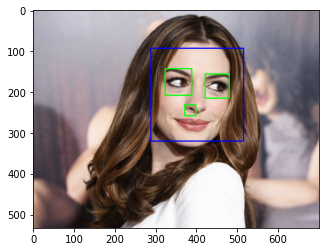

In [15]:
import cv2
from pnslib import utils
import matplotlib.pyplot as plt

# read image
img = cv2.imread("Anne.jpg")

# load face cascade and eye cascade
face_cascade = cv2.CascadeClassifier(
    utils.get_haarcascade_path('haarcascade_frontalface_default.xml'))
eye_cascade = cv2.CascadeClassifier(
    utils.get_haarcascade_path('haarcascade_eye.xml'))

# search face
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)


img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img)
plt.show()